Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [3]:
# cell for imports. All imports must go here.
import matplotlib.pyplot as plt
import pandas as pd

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [12]:
df = pd.read_csv("train.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [49]:
print(df.head(4))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

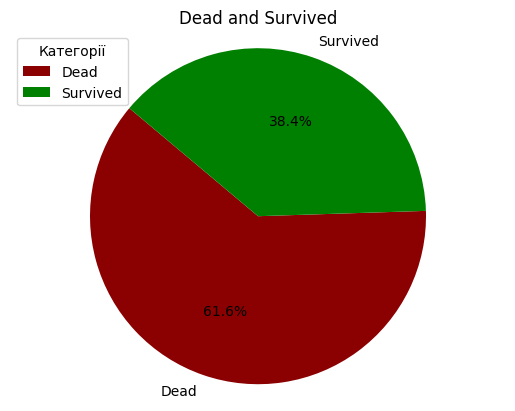

In [75]:
labels = ['Dead', 'Survived']
sizes =  df['Survived'].value_counts()
colors = ['darkred', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Dead and Survived')

plt.legend(labels, loc='upper left', title='Категорії', fontsize=10, markerscale=2)

plt.axis('equal')
plt.show()


На діагамі зображено співвідношення між загиблими та вижившими, написано відсотки категоріЙ. У верхньому лівому кутку є легенда.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


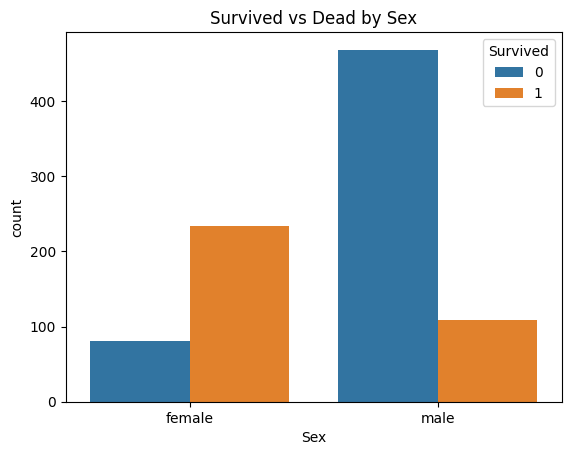

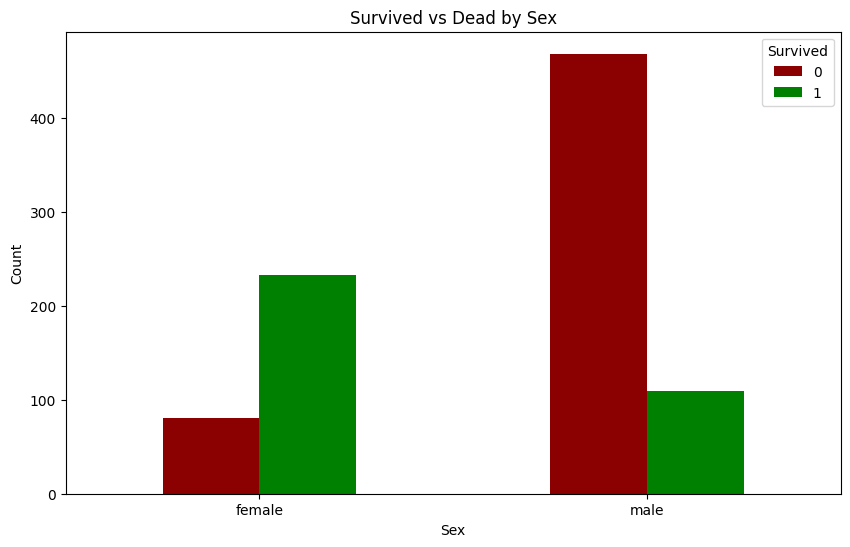

In [76]:
grouped = df.groupby(['Sex', 'Survived'], as_index=False).size()

grouped_pivot = grouped.pivot(index='Sex', columns='Survived', values='size').fillna(0)

grouped_pivot.plot(kind='bar', stacked=False, color=['darkred', 'green'], figsize=(10, 6))

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


На діаграмі зображено співвідношення між загиблими та вижившими за статтями. Зліва шкала кількості, знизу підписано де жінки, де чоловіки. У верхньому правому кутку легенда.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

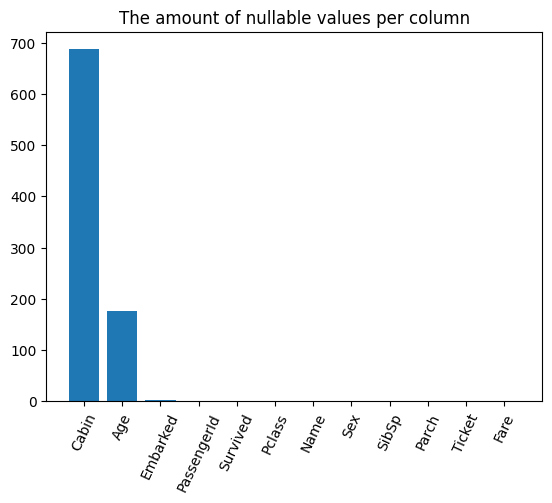

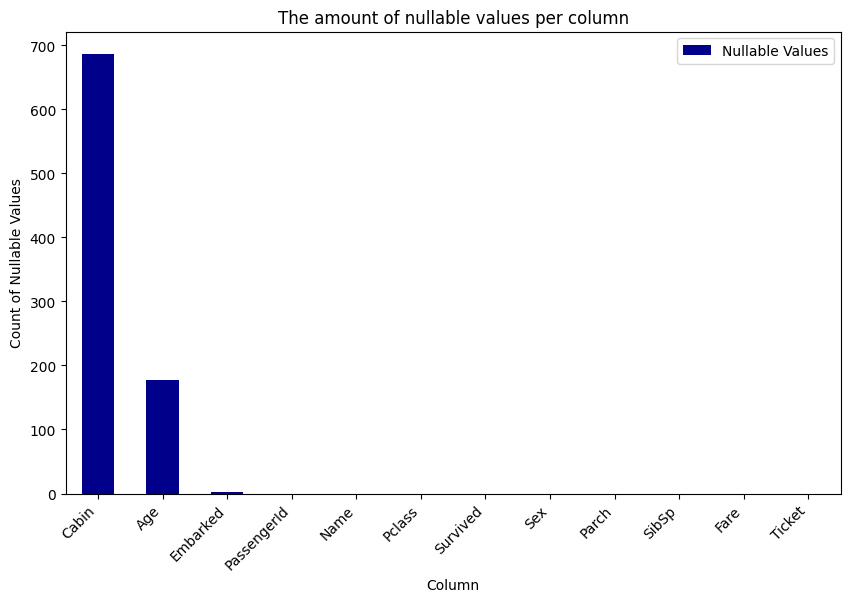

In [103]:
missing_values = df.isnull().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Nullable Values']

missing_values_df = missing_values_df.sort_values('Nullable Values', ascending=False)

missing_values_df.plot(kind='bar', x='Column', y='Nullable Values', stacked=False, color='darkblue', figsize=(10, 6))


plt.title('The amount of nullable values per column')
plt.ylabel('Count of Nullable Values')
plt.xticks(rotation=45, ha='right')
plt.show()


На діаграмі зображено кількість нульових значень за колонками, зліва шкала кількості знизу під кожним стовпцем назва колонки

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

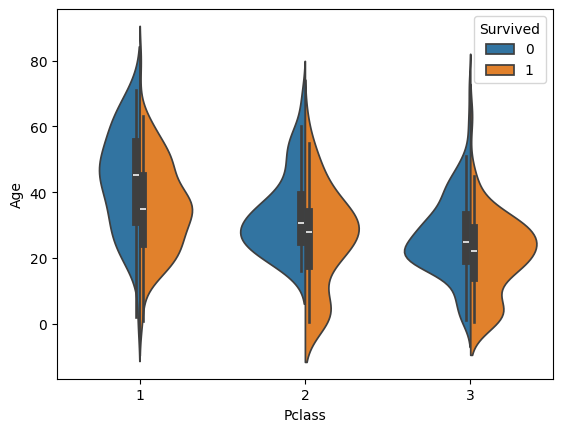

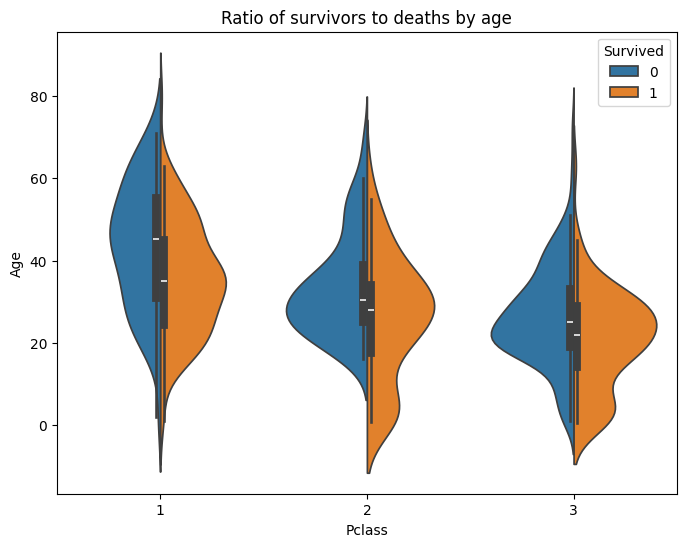

In [107]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)

plt.legend(title='Survived')
plt.title("Ratio of survivors to deaths by age")
plt.show()

На діаграмі зображено співвідношення між загиблми та вижившими в розрізі віку, зліва шкала віку, знизу клас квитка

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


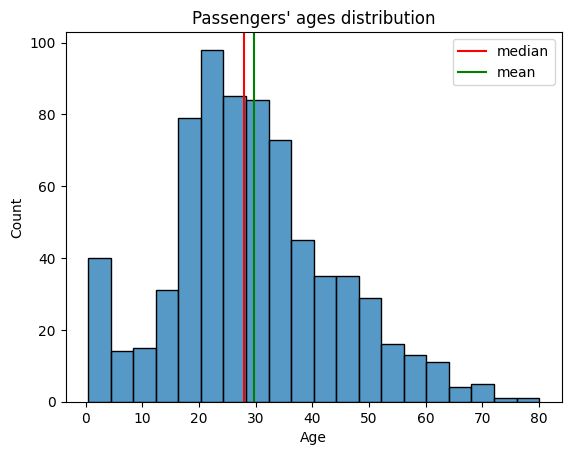

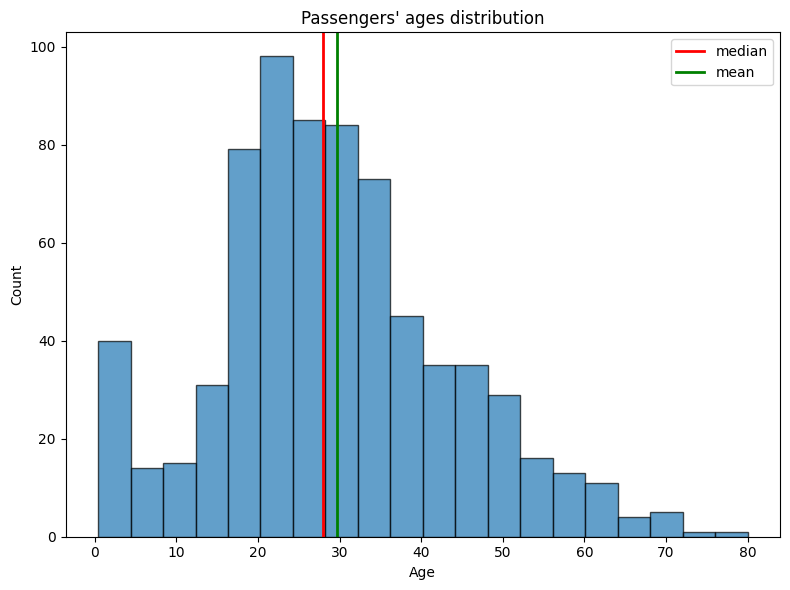

In [111]:
age_data = df['Age'].dropna()

median_age = age_data.median()
mean_age = age_data.mean()


plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, edgecolor='black', alpha=0.7)


plt.axvline(median_age, color='red', label='median', linewidth=2)
plt.axvline(mean_age, color='green', label='mean', linewidth=2)

plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


На діаграмі зображено розподіл віку пасажирів із позначенням середнього значення (mean) та медіани (median), знизу вікова шкала, зправа шкала кількості.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

*прокоментуйте отримані візуалізації

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

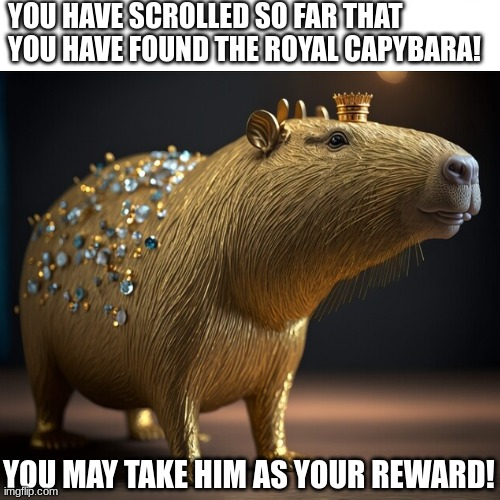